![img_uba](https://github.com/hernancontigiani/ceia_memorias_especializacion/raw/master/Figures/logoFIUBA.jpg)

# Procesamiento de lenguaje natural
## Bert Sentiment Analysis
## Noelia Qualindi

In [1]:
!pip uninstall -y tensorflow keras
!pip install tensorflow

Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Successfully uninstalled tensorflow-2.17.0
Found existing installation: keras 3.5.0
Uninstalling keras-3.5.0:
  Successfully uninstalled keras-3.5.0
  Using cached tensorflow-2.17.0-cp310-cp310-macosx_12_0_arm64.whl.metadata (4.1 kB)
  Using cached keras-3.5.0-py3-none-any.whl.metadata (5.8 kB)
Using cached tensorflow-2.17.0-cp310-cp310-macosx_12_0_arm64.whl (236.1 MB)
Using cached keras-3.5.0-py3-none-any.whl (1.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-macos 2.16.2 requires tensorflow==2.16.2; platform_system == "Darwin" and platform_machine == "arm64", but you have tensorflow 2.17.0 which is incompatible.


In [2]:
!pip install transformers --quiet

In [3]:
from transformers import TFBertModel
import tensorflow

/opt/anaconda3/envs/anaconda_python_3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Modelo con 5 Clases

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_train_metrics(history):
    # Obtener los datos de precisión y pérdida de entrenamiento y validación
    acc = history.history.get('accuracy', [])
    val_acc = history.history.get('val_accuracy', [])
    loss = history.history.get('loss', [])
    val_loss = history.history.get('val_loss', [])
    
    epoch_count = range(1, len(acc) + 1)
    
    # Graficar precisión
    plt.figure(figsize=(8, 4))
    sns.lineplot(x=epoch_count, y=acc, label='Train Accuracy')
    sns.lineplot(x=epoch_count, y=val_acc, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()
    
    # Graficar pérdida
    plt.figure(figsize=(8, 4))
    sns.lineplot(x=epoch_count, y=loss, label='Train Loss')
    sns.lineplot(x=epoch_count, y=val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

### Datos
Utilizaremos como dataset críticas de Google Apps en formato csv.

In [5]:
# Descargar la carpeta de dataset
!curl -L -o 'apps.csv' 'https://drive.google.com/u/0/uc?id=1S6qMioqPJjyBLpLVz4gmRTnJHnjitnuV&export=download&confirm=t'
!curl -L -o 'reviews.csv' 'https://drive.google.com/u/0/uc?id=1zdmewp7ayS4js4VtrJEHzAheSW-5NBZv&export=download&confirm=t'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  131k  100  131k    0     0  46653      0  0:00:02  0:00:02 --:--:-- 60773
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0-     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 7002k  100 7002k    0     0   435k      0  0:00:16  0:00:16 --:--:-- 1592k


In [5]:
import pandas as pd
# Armar el dataset
df = pd.read_csv('reviews.csv')
df.head()

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,Andrew Thomas,https://lh3.googleusercontent.com/a-/AOh14GiHd...,Update: After getting a response from the deve...,1,21,4.17.0.3,2020-04-05 22:25:57,"According to our TOS, and the term you have ag...",2020-04-05 15:10:24,most_relevant,com.anydo
1,Craig Haines,https://lh3.googleusercontent.com/-hoe0kwSJgPQ...,Used it for a fair amount of time without any ...,1,11,4.17.0.3,2020-04-04 13:40:01,It sounds like you logged in with a different ...,2020-04-05 15:11:35,most_relevant,com.anydo
2,steven adkins,https://lh3.googleusercontent.com/a-/AOh14GiXw...,Your app sucks now!!!!! Used to be good but no...,1,17,4.17.0.3,2020-04-01 16:18:13,This sounds odd! We are not aware of any issue...,2020-04-02 16:05:56,most_relevant,com.anydo
3,Lars Panzerbjørn,https://lh3.googleusercontent.com/a-/AOh14Gg-h...,"It seems OK, but very basic. Recurring tasks n...",1,192,4.17.0.2,2020-03-12 08:17:34,We do offer this option as part of the Advance...,2020-03-15 06:20:13,most_relevant,com.anydo
4,Scott Prewitt,https://lh3.googleusercontent.com/-K-X1-YsVd6U...,Absolutely worthless. This app runs a prohibit...,1,42,4.17.0.2,2020-03-14 17:41:01,We're sorry you feel this way! 90% of the app ...,2020-03-15 23:45:51,most_relevant,com.anydo


In [7]:
df.tail()

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
15741,Tammy Kay,https://lh3.googleusercontent.com/a-/AOh14GhYP...,I believe that this is by far the best app wit...,5,0,NaN,2018-02-17 06:09:03,NaN,NaN,newest,com.appxy.planner
15742,Ysm Johan,https://lh3.googleusercontent.com/a-/AOh14Ggmd...,It sometimes crashes a lot!!,5,0,4.3.7,2018-02-15 10:45:22,NaN,NaN,newest,com.appxy.planner
15743,casey dearden,https://lh3.googleusercontent.com/a-/AOh14Gg2U...,Works well for what I need,5,0,4.3.7,2018-02-09 18:40:37,NaN,NaN,newest,com.appxy.planner
15744,Jerry G Tamate,https://lh3.googleusercontent.com/a-/AOh14GiTP...,Love it.,5,0,NaN,2018-02-06 12:36:17,NaN,NaN,newest,com.appxy.planner
15745,Ahmed elsalamouni,https://lh3.googleusercontent.com/-9QSxVUhCoDI...,Really amazing and helped me sooo much just i ...,5,6,4.3.7,2018-02-04 22:57:09,NaN,NaN,newest,com.appxy.planner


In [6]:
print("Cantidad de críticas:", len(df))

Cantidad de críticas: 15746


In [7]:
print(df.columns)

Index(['userName', 'userImage', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt', 'sortOrder',
       'appId'],
      dtype='object')


/var/folders/ml/g_sxsst10mj890krz6gpp0980000gn/T/ipykernel_19088/511599590.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['score'], palette=palette)


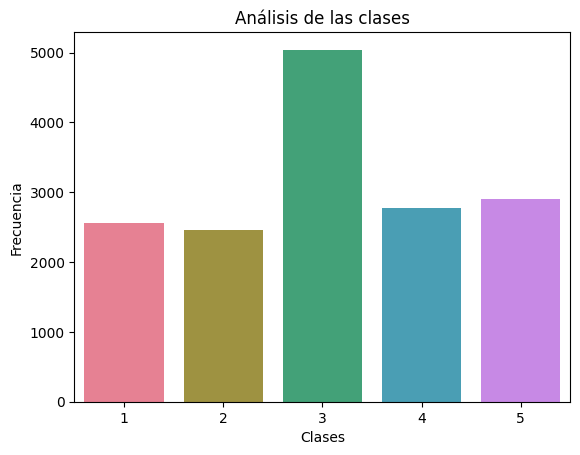

In [10]:
# ¿Cómo están balanceados los datos?
palette = sns.color_palette("husl", df['score'].nunique())  

sns.countplot(x=df['score'], palette=palette)

plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.title('Análisis de las clases')

plt.show()

In [39]:
from tensorflow.keras.utils import to_categorical

print(df['score'].unique())  # esto debería mostrar [1, 2, 3, 4, 5]

y = df['score'].values - 1  # restar 1 para que las clases vayan de 0 a 4
y = to_categorical(y, num_classes=5)  # convertir a one-hot encoding con 5 clases
num_classes = y.shape[1]
print("Número de clases:", num_classes) 

[1 2 3 4 5]
Número de clases: 5


sentences shape: (15746,)
["Update: After getting a response from the developer I would change my rating to 0 stars if possible. These guys hide behind confusing and opaque terms and refuse to budge at all. I'm so annoyed that my money has been lost to them! Really terrible customer experience. Original: Be very careful when signing up for a free trial of this app. If you happen to go over they automatically charge you for a full years subscription and refuse to refund. Terrible customer experience and the app is just OK."
 'Used it for a fair amount of time without any problems. Suddenly then asked me to create an account or log using Google or FB. I used my Google one only to discover everything was gone!'
 "Your app sucks now!!!!! Used to be good but now doesn't update until I physically open it up and then close it then scroll and then it finally shows what I want to put on the list!!!!!! And I FRIGGEN paid for this garbage!!!!!!!"]


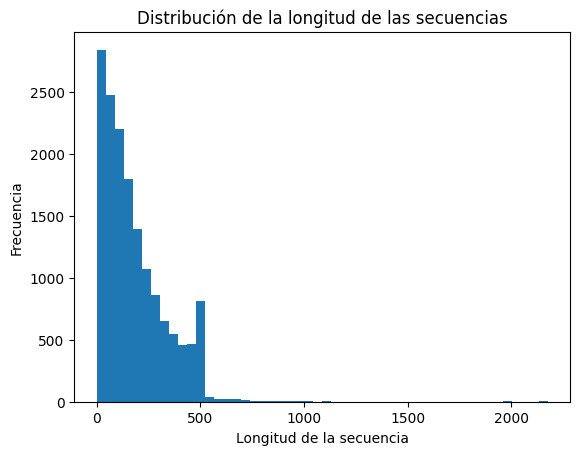

Longitud máxima: 2176
Longitud media: 180.92677505398197
Percentil 90 de la longitud: 422.0
Mediana: 139.0
Media 181.0
Moda ModeResult(mode=4, count=178)


In [56]:
import numpy as np
import scipy.stats as stats

sentences = df['content'].values
print("sentences shape:", sentences.shape)
print(sentences[:3])

sequence_lengths = [len(seq) for seq in sentences]
plt.hist(sequence_lengths, bins=50)
plt.xlabel('Longitud de la secuencia')
plt.ylabel('Frecuencia')
plt.title('Distribución de la longitud de las secuencias')
plt.show()

print(f"Longitud máxima: {max(sequence_lengths)}")
print(f"Longitud media: {np.mean(sequence_lengths)}")
print(f"Percentil 90 de la longitud: {np.percentile(sequence_lengths, 90)}")

print("Mediana:", round(np.median(sequence_lengths),0))
print('Media', round(np.mean(sequence_lengths),0))
print('Moda', stats.mode(sequence_lengths))

## Procesamiento, Tokenización y generador de datos


In [57]:
from transformers import InputExample, InputFeatures  # Métodos para transformar el dataset
from transformers import BertTokenizer, TFBertModel
import numpy as np

bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [58]:
from sklearn.model_selection import train_test_split

indices = np.arange(len(sentences))

idx_train_val, idx_test = train_test_split(indices, test_size=0.2, random_state=42)
idx_train, idx_val = train_test_split(idx_train_val, test_size=0.2, random_state=42)


print(idx_train.shape[0], idx_val.shape[0], idx_test.shape[0])

10076 2520 3150


In [59]:
print(f"Cantidad de muestras en el conjunto de entrenamiento: {idx_train.shape[0]}")
print(f"Cantidad de muestras en el conjunto de validación: {idx_val.shape[0]}")
print(f"Cantidad de muestras en el conjunto de test: {idx_test.shape[0]}")

Cantidad de muestras en el conjunto de entrenamiento: 10076
Cantidad de muestras en el conjunto de validación: 2520
Cantidad de muestras en el conjunto de test: 3150


Dado que la longitud mediana es de 139, el max_length se pondra en 139 para que pueda capturar la mayor parte de la info relevante.

In [77]:
max_length = 139
num_classes = 5 # output shapes

Hiperparámetros

In [61]:
batch_size = 32
epochs = 15

In [76]:
import tensorflow

def convert_data_to_examples(text, labels, idx_train, idx_val):
    # Armamos un "InputExample" para los datos de entrenamiento y validación
    train_InputExamples = [InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = text[i], 
                                                          text_b = None,
                                                          label = labels[i]) for i in idx_train]

    validation_InputExamples = [InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = text[i],
                                                          text_b = None,
                                                          label = labels[i]) for i in idx_val]
  
    return train_InputExamples, validation_InputExamples

 
def convert_examples_to_tf_dataset(examples, bert_tokenizer, num_classes=5, max_length=512):
    # Transformamos los datos de entrada en tensorres de:
    # input_ids --> token id
    # attention_mask
    # token type
    features = []

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = bert_tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=False,
            return_attention_mask=True,
            padding='max_length', # pads to the right by default # CHECK THIS for pad_to_max_length
            truncation=True
        )

        input_ids, attention_mask = (input_dict["input_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, label=e.label
            )
        )

    def gen():
    # Función generadora para no levantar todos los datos en un instante
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                },
                f.label,
            )

    return tensorflow.data.Dataset.from_generator(
        # Tensorflow dataset generator (basado en el generador y en el esquema de datos definido)
        gen,
        ({"input_ids": tensorflow.int32, "attention_mask": tensorflow.int32}, tensorflow.float32),
        (
            {
                "input_ids": tensorflow.TensorShape([None]),
                "attention_mask": tensorflow.TensorShape([None]),
            },
            tensorflow.TensorShape([num_classes]),
        ),
    )

In [78]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(sentences, y, idx_train, idx_val)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), bert_tokenizer, num_classes=num_classes, max_length=max_length,)
train_data = train_data.shuffle(100).batch(batch_size)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), bert_tokenizer, num_classes=num_classes, max_length=max_length)
validation_data = validation_data.batch(batch_size)

In [79]:
pred_sentences = [sentences[i] for i in idx_test]
tf_batch = bert_tokenizer(pred_sentences, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

In [80]:
X_test = [tf_batch['input_ids'],  
          tf_batch['attention_mask']]

y_test = y[idx_test]

## BERT classification

### Sin descongelamiento de capas

In [81]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [82]:
import tensorflow as tf 

class BertLayer(tf.keras.layers.Layer):
    def __init__(self, model_name='bert-base-uncased', fine_tune_layers=None, unfreeze_all_layers=False, **kwargs):
        super(BertLayer, self).__init__(**kwargs)
        self.bert_model = TFBertModel.from_pretrained(model_name)
        total_layers = len(self.bert_model.bert.encoder.layer)

        if unfreeze_all_layers:
            # Descongelar todas las capas
            print("Descongelando todas las capas:", total_layers)
            for layer in self.bert_model.layers:
                print(f"Layer name: {layer.name}, Trainable: {layer.trainable}")
                layer.trainable = True
        elif fine_tune_layers is not None:
            print(f"Descongelando {fine_tune_layers} capas de {total_layers}")
            for layer in self.bert_model.bert.encoder.layer[:-fine_tune_layers]:
                layer.trainable = False
            for layer in self.bert_model.bert.encoder.layer[-fine_tune_layers:]:
                layer.trainable = True
        else:
            # Congelar todas las capas por defecto
            self.bert_model.trainable = False
        
    def call(self, inputs):
        input_ids, attention_mask = inputs
        outputs = self.bert_model(input_ids=input_ids, attention_mask=attention_mask)
        return outputs.pooler_output

def build_classification_model(model_name='bert-base-uncased', num_classes=5, max_length=140, fine_tune_layers=None, unfreeze_all_layers=False):
    input_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='input_ids')
    attention_mask = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='attention_mask')
    
     # Crear instancia del BertLayer
    bert_layer = BertLayer(model_name=model_name, fine_tune_layers=fine_tune_layers, unfreeze_all_layers=unfreeze_all_layers)
    bert_output = bert_layer([input_ids, attention_mask])

    for layer in bert_layer.bert_model.bert.encoder.layer:
        print(f"Layer name: {layer.name}, Trainable: {layer.trainable}")

    x = tf.keras.layers.Dropout(0.2)(bert_output)
    output = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
    
    model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                  loss='categorical_crossentropy', 
                  metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
    
    model.summary()
    return model


In [83]:
print("Forma de y después de to_categorical:", y.shape)
print("Primeras 3 etiquetas one-hot:", y[:3])

Forma de y después de to_categorical: (15746, 5)
Primeras 3 etiquetas one-hot: [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [84]:
bert_model_5 = build_classification_model(model_name='bert-base-uncased', num_classes=num_classes, max_length=max_length, unfreeze_all_layers=False)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Layer name: layer_._0, Trainable: False
Layer name: layer_._1, Trainable: False
Layer name: layer_._2, Trainable: False
Layer name: layer_._3, Trainable: False
Layer name: layer_._4, Trainable: False
Layer name: layer_._5, Trainable: False
Layer name: layer_._6, Trainable: False
Layer name: layer_._7, Trainable: False
Layer name: layer_._8, Trainable: False
Layer name: layer_._9, Trainable: False
Layer name: layer_._10, Trainable: False
Layer name: layer_._11, Trainable: False


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_ids           │ (None, 139)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_mask      │ (None, 139)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_layer_5        │ (None, 768)       │          0 │ input_ids[0][0],  │
│ (BertLayer)         │                   │            │ attention_mask[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 768)       │          0 │ bert_layer_5[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 5)         │      3,845 │ dropout_5[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,845 (15.02 KB)

 Trainable params: 3,845 (15.02 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
history_5_classes = bert_model_5.fit(train_data, epochs=epochs, validation_data=validation_data)

Epoch 1/15


2024-09-01 03:09:32.061599: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


    315/Unknown 139s 425ms/step - accuracy: 0.2661 - loss: 1.6499 - precision_5: 0.2716 - recall_5: 0.0113

2024-09-01 03:11:49.490924: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-09-01 03:11:49.490933: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 4641929728281370998
2024-09-01 03:11:49.490937: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 3538206183956763002
2024-09-01 03:11:49.490940: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/functional_5_1/bert_layer_5_1/tf_bert_model_9/bert/embeddings/assert_less/Assert/Assert/data_0/_36]]
2024-09-01 03:11:49.490947: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12176405399365243674
2024-09-01 03:11:49.490950: I tensorflow/core/framework

315/315 ━━━━━━━━━━━━━━━━━━━━ 174s 538ms/step - accuracy: 0.2661 - loss: 1.6499 - precision_5: 0.2717 - recall_5: 0.0113 - val_accuracy: 0.3183 - val_loss: 1.5699 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00
Epoch 2/15


2024-09-01 03:12:24.597674: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 3130739515657617772
2024-09-01 03:12:24.597684: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_30]]
2024-09-01 03:12:24.597693: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3888383248557564742
2024-09-01 03:12:24.597700: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 11604395267307304417
2024-09-01 03:12:24.597704: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 2150177401882560140
2024-09-01 03:12:24.597708: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 1497665202137216840
2024-09-01 03:12:24.597712: I tensorflow/cor

315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step - accuracy: 0.2832 - loss: 1.6209 - precision_5: 0.3303 - recall_5: 0.0144

2024-09-01 03:14:37.803380: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 4641929728281370998
2024-09-01 03:14:37.803406: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 3538206183956763002
2024-09-01 03:14:37.803410: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 2515123663406702721
2024-09-01 03:14:37.803423: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12176405399365243674
2024-09-01 03:14:37.803431: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15005315954439476338
2024-09-01 03:14:37.803432: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 617755966649599598
2024-09-01 03:14:37.803436: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv it

315/315 ━━━━━━━━━━━━━━━━━━━━ 167s 529ms/step - accuracy: 0.2832 - loss: 1.6209 - precision_5: 0.3303 - recall_5: 0.0144 - val_accuracy: 0.3183 - val_loss: 1.5650 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00
Epoch 3/15


2024-09-01 03:15:11.317243: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 3130739515657617772
2024-09-01 03:15:11.317254: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3888383248557564742
2024-09-01 03:15:11.317256: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 2150177401882560140
2024-09-01 03:15:11.317258: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 1497665202137216840
2024-09-01 03:15:11.317263: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 11604395267307304417
2024-09-01 03:15:11.317265: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 17372686989608412827
2024-09-01 03:15:11.317268: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv i

315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 0.2777 - loss: 1.6333 - precision_5: 0.2781 - recall_5: 0.0097

2024-09-01 03:17:24.989799: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 4641929728281370998
2024-09-01 03:17:24.989810: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 3538206183956763002
2024-09-01 03:17:24.989817: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12176405399365243674
2024-09-01 03:17:24.989822: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15005315954439476338
2024-09-01 03:17:24.989824: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 617755966649599598
2024-09-01 03:17:24.989828: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 17039644123114866628
2024-09-01 03:17:24.989830: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv i

315/315 ━━━━━━━━━━━━━━━━━━━━ 167s 531ms/step - accuracy: 0.2777 - loss: 1.6333 - precision_5: 0.2781 - recall_5: 0.0097 - val_accuracy: 0.3183 - val_loss: 1.5626 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00
Epoch 4/15


2024-09-01 03:17:58.418049: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12742346130243863269
2024-09-01 03:17:58.418069: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13634423211118158693
2024-09-01 03:17:58.418074: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1087990400445989645
2024-09-01 03:17:58.418077: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 11604395267307304417
2024-09-01 03:17:58.418081: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 5665152969236698763
2024-09-01 03:17:58.418084: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15261069020779511487
2024-09-01 03:17:58.418089: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv

315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.2786 - loss: 1.6192 - precision_5: 0.3333 - recall_5: 0.0115

2024-09-01 03:20:15.597757: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 4641929728281370998
2024-09-01 03:20:15.597790: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 617755966649599598
2024-09-01 03:20:15.597795: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 2515123663406702721
2024-09-01 03:20:15.597810: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 17039644123114866628
2024-09-01 03:20:15.597824: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13748331579387035697
2024-09-01 03:20:15.597835: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 8265604768781968025
2024-09-01 03:20:15.597839: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv it

315/315 ━━━━━━━━━━━━━━━━━━━━ 170s 542ms/step - accuracy: 0.2786 - loss: 1.6192 - precision_5: 0.3332 - recall_5: 0.0115 - val_accuracy: 0.3183 - val_loss: 1.5629 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00
Epoch 5/15


2024-09-01 03:20:48.916955: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 3130739515657617772
2024-09-01 03:20:48.916974: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3888383248557564742
2024-09-01 03:20:48.916977: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_30]]
2024-09-01 03:20:48.916990: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 2150177401882560140
2024-09-01 03:20:48.917003: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 1497665202137216840
2024-09-01 03:20:48.917011: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 11604395267307304417
2024-09-01 03:20:48.917014: I tensorflow/cor

315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 0.2807 - loss: 1.6166 - precision_5: 0.3445 - recall_5: 0.0112

2024-09-01 03:23:03.137482: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 4641929728281370998
2024-09-01 03:23:03.137728: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 3538206183956763002
2024-09-01 03:23:03.137734: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12176405399365243674
2024-09-01 03:23:03.137737: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15005315954439476338
2024-09-01 03:23:03.137740: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 2515123663406702721
2024-09-01 03:23:03.137772: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 617755966649599598
2024-09-01 03:23:03.137791: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv it

315/315 ━━━━━━━━━━━━━━━━━━━━ 167s 530ms/step - accuracy: 0.2807 - loss: 1.6166 - precision_5: 0.3445 - recall_5: 0.0112 - val_accuracy: 0.3183 - val_loss: 1.5619 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00
Epoch 6/15


2024-09-01 03:23:35.988772: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 3130739515657617772
2024-09-01 03:23:35.988788: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3888383248557564742
2024-09-01 03:23:35.988792: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 11604395267307304417
2024-09-01 03:23:35.988801: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 17372686989608412827
2024-09-01 03:23:35.988805: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 2150177401882560140
2024-09-01 03:23:35.988812: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 1497665202137216840
2024-09-01 03:23:35.988816: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv i

315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.2820 - loss: 1.6177 - precision_5: 0.2678 - recall_5: 0.0091

2024-09-01 03:25:53.388826: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12176405399365243674
2024-09-01 03:25:53.388849: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15005315954439476338
2024-09-01 03:25:53.388852: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 2515123663406702721
2024-09-01 03:25:53.388865: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13748331579387035697
2024-09-01 03:25:53.388871: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1102204673094145904
2024-09-01 03:25:53.388878: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 17039644123114866628
2024-09-01 03:25:53.388881: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv

315/315 ━━━━━━━━━━━━━━━━━━━━ 171s 542ms/step - accuracy: 0.2820 - loss: 1.6177 - precision_5: 0.2679 - recall_5: 0.0091 - val_accuracy: 0.3218 - val_loss: 1.5620 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00
Epoch 7/15


2024-09-01 03:26:26.611026: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 3130739515657617772
2024-09-01 03:26:26.611040: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3888383248557564742
2024-09-01 03:26:26.611047: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 2150177401882560140
2024-09-01 03:26:26.611050: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 1497665202137216840
2024-09-01 03:26:26.611054: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 11604395267307304417
2024-09-01 03:26:26.611064: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 17372686989608412827
2024-09-01 03:26:26.611072: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv i

315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step - accuracy: 0.2752 - loss: 1.6245 - precision_5: 0.3152 - recall_5: 0.0092

2024-09-01 03:28:38.755540: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 4641929728281370998
2024-09-01 03:28:38.755558: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 3538206183956763002
2024-09-01 03:28:38.755563: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 2515123663406702721
2024-09-01 03:28:38.755600: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 8265604768781968025
2024-09-01 03:28:38.755602: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12176405399365243674
2024-09-01 03:28:38.755607: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 617755966649599598
2024-09-01 03:28:38.755611: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv ite

315/315 ━━━━━━━━━━━━━━━━━━━━ 165s 524ms/step - accuracy: 0.2752 - loss: 1.6245 - precision_5: 0.3153 - recall_5: 0.0092 - val_accuracy: 0.3187 - val_loss: 1.5613 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00
Epoch 8/15


2024-09-01 03:29:11.644816: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 3130739515657617772
2024-09-01 03:29:11.644832: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3888383248557564742
2024-09-01 03:29:11.644835: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 2150177401882560140
2024-09-01 03:29:11.644839: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 1497665202137216840
2024-09-01 03:29:11.644842: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 11604395267307304417
2024-09-01 03:29:11.644850: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 17372686989608412827
2024-09-01 03:29:11.644857: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv i

315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step - accuracy: 0.2802 - loss: 1.6155 - precision_5: 0.2537 - recall_5: 0.0071

2024-09-01 03:31:20.543841: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 4641929728281370998
2024-09-01 03:31:20.543852: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 3538206183956763002
2024-09-01 03:31:20.543857: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 2515123663406702721
2024-09-01 03:31:20.543873: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 8265604768781968025
2024-09-01 03:31:20.543876: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12176405399365243674
2024-09-01 03:31:20.543888: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 265813597895475767
2024-09-01 03:31:20.543897: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv ite

315/315 ━━━━━━━━━━━━━━━━━━━━ 161s 510ms/step - accuracy: 0.2802 - loss: 1.6155 - precision_5: 0.2537 - recall_5: 0.0071 - val_accuracy: 0.3183 - val_loss: 1.5611 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00
Epoch 9/15


2024-09-01 03:31:52.183361: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 3130739515657617772
2024-09-01 03:31:52.183372: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3888383248557564742
2024-09-01 03:31:52.183375: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 2150177401882560140
2024-09-01 03:31:52.183377: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 1497665202137216840
2024-09-01 03:31:52.183381: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 5665152969236698763
2024-09-01 03:31:52.183383: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 17372686989608412827
2024-09-01 03:31:52.183389: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is abor

315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step - accuracy: 0.2857 - loss: 1.6116 - precision_5: 0.3141 - recall_5: 0.0076

2024-09-01 03:34:00.962243: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 4641929728281370998
2024-09-01 03:34:00.962253: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 617755966649599598
2024-09-01 03:34:00.962259: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13748331579387035697
2024-09-01 03:34:00.962269: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 17039644123114866628
2024-09-01 03:34:00.962279: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 2515123663406702721
2024-09-01 03:34:00.962286: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3575663468795456386
2024-09-01 03:34:00.962292: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv it

315/315 ━━━━━━━━━━━━━━━━━━━━ 161s 513ms/step - accuracy: 0.2858 - loss: 1.6116 - precision_5: 0.3142 - recall_5: 0.0076 - val_accuracy: 0.3218 - val_loss: 1.5616 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00
Epoch 10/15


2024-09-01 03:34:33.639399: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 3130739515657617772
2024-09-01 03:34:33.639411: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3888383248557564742
2024-09-01 03:34:33.639415: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 2150177401882560140
2024-09-01 03:34:33.639418: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 1497665202137216840
2024-09-01 03:34:33.639423: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 11604395267307304417
2024-09-01 03:34:33.639430: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 17372686989608412827
2024-09-01 03:34:33.639437: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv i

315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step - accuracy: 0.2813 - loss: 1.6111 - precision_5: 0.3342 - recall_5: 0.0076

2024-09-01 03:36:46.265577: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 4641929728281370998
2024-09-01 03:36:46.265593: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 3538206183956763002
2024-09-01 03:36:46.265597: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 2515123663406702721
2024-09-01 03:36:46.265605: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13748331579387035697
2024-09-01 03:36:46.265609: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12176405399365243674
2024-09-01 03:36:46.265617: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15005315954439476338
2024-09-01 03:36:46.265620: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv 

315/315 ━━━━━━━━━━━━━━━━━━━━ 165s 525ms/step - accuracy: 0.2814 - loss: 1.6111 - precision_5: 0.3342 - recall_5: 0.0076 - val_accuracy: 0.3242 - val_loss: 1.5618 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00
Epoch 11/15


2024-09-01 03:37:19.058437: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 3130739515657617772
2024-09-01 03:37:19.058454: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3888383248557564742
2024-09-01 03:37:19.058471: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 2150177401882560140
2024-09-01 03:37:19.058473: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 11604395267307304417
2024-09-01 03:37:19.058488: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 17372686989608412827
2024-09-01 03:37:19.058491: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 1497665202137216840
2024-09-01 03:37:19.058500: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv i

315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - accuracy: 0.2853 - loss: 1.6123 - precision_5: 0.3481 - recall_5: 0.0076

2024-09-01 03:39:32.583457: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 4641929728281370998
2024-09-01 03:39:32.583477: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 3538206183956763002
2024-09-01 03:39:32.583482: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 584515271023496254
2024-09-01 03:39:32.583498: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 2515123663406702721
2024-09-01 03:39:32.583503: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12176405399365243674
2024-09-01 03:39:32.583515: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 617755966649599598
2024-09-01 03:39:32.583518: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item

315/315 ━━━━━━━━━━━━━━━━━━━━ 168s 533ms/step - accuracy: 0.2854 - loss: 1.6123 - precision_5: 0.3481 - recall_5: 0.0076 - val_accuracy: 0.3242 - val_loss: 1.5610 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00
Epoch 12/15


2024-09-01 03:40:06.933053: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 3130739515657617772
2024-09-01 03:40:06.933076: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3888383248557564742
2024-09-01 03:40:06.933083: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 2150177401882560140
2024-09-01 03:40:06.933086: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 1497665202137216840
2024-09-01 03:40:06.933089: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 11604395267307304417
2024-09-01 03:40:06.933096: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 17372686989608412827
2024-09-01 03:40:06.933103: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv i

315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step - accuracy: 0.2906 - loss: 1.6070 - precision_5: 0.3462 - recall_5: 0.0074

2024-09-01 03:42:21.619306: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 4641929728281370998
2024-09-01 03:42:21.619323: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 2515123663406702721
2024-09-01 03:42:21.619335: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13748331579387035697
2024-09-01 03:42:21.619341: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 8265604768781968025
2024-09-01 03:42:21.619344: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 3538206183956763002
2024-09-01 03:42:21.619351: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 265813597895475767
2024-09-01 03:42:21.619352: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv ite

315/315 ━━━━━━━━━━━━━━━━━━━━ 167s 530ms/step - accuracy: 0.2906 - loss: 1.6070 - precision_5: 0.3460 - recall_5: 0.0074 - val_accuracy: 0.3242 - val_loss: 1.5617 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00
Epoch 13/15


2024-09-01 03:42:53.946092: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 3130739515657617772
2024-09-01 03:42:53.946104: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3888383248557564742
2024-09-01 03:42:53.946106: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 2150177401882560140
2024-09-01 03:42:53.946109: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 11604395267307304417
2024-09-01 03:42:53.946123: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 17372686989608412827
2024-09-01 03:42:53.946127: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 1497665202137216840
2024-09-01 03:42:53.946138: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv i

315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - accuracy: 0.2851 - loss: 1.6141 - precision_5: 0.3154 - recall_5: 0.0057

2024-09-01 03:45:07.313074: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 4641929728281370998
2024-09-01 03:45:07.313094: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 617755966649599598
2024-09-01 03:45:07.313099: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 17039644123114866628
2024-09-01 03:45:07.313103: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13748331579387035697
2024-09-01 03:45:07.313117: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 2515123663406702721
2024-09-01 03:45:07.313122: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12676411956887807762
2024-09-01 03:45:07.313130: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv i

315/315 ━━━━━━━━━━━━━━━━━━━━ 167s 531ms/step - accuracy: 0.2851 - loss: 1.6141 - precision_5: 0.3154 - recall_5: 0.0057 - val_accuracy: 0.3187 - val_loss: 1.5603 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00
Epoch 14/15


2024-09-01 03:45:41.107017: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 3130739515657617772
2024-09-01 03:45:41.107045: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3888383248557564742
2024-09-01 03:45:41.107049: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 2150177401882560140
2024-09-01 03:45:41.107052: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 1497665202137216840
2024-09-01 03:45:41.107057: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 11604395267307304417
2024-09-01 03:45:41.107064: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 17372686989608412827
2024-09-01 03:45:41.107071: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv i

315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step - accuracy: 0.2772 - loss: 1.6092 - precision_5: 0.3031 - recall_5: 0.0047

2024-09-01 03:47:53.835498: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 4641929728281370998
2024-09-01 03:47:53.835517: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 3538206183956763002
2024-09-01 03:47:53.835521: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12176405399365243674
2024-09-01 03:47:53.835523: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 617755966649599598
2024-09-01 03:47:53.835527: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 17039644123114866628
2024-09-01 03:47:53.835530: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3575663468795456386
2024-09-01 03:47:53.835532: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send it

315/315 ━━━━━━━━━━━━━━━━━━━━ 165s 524ms/step - accuracy: 0.2772 - loss: 1.6092 - precision_5: 0.3031 - recall_5: 0.0047 - val_accuracy: 0.3210 - val_loss: 1.5610 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00
Epoch 15/15


2024-09-01 03:48:26.111046: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 3130739515657617772
2024-09-01 03:48:26.111058: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3888383248557564742
2024-09-01 03:48:26.111062: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 2150177401882560140
2024-09-01 03:48:26.111066: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 1497665202137216840
2024-09-01 03:48:26.111069: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 11604395267307304417
2024-09-01 03:48:26.111075: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 17372686989608412827
2024-09-01 03:48:26.111081: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv i

315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - accuracy: 0.2881 - loss: 1.6008 - precision_5: 0.3385 - recall_5: 0.0056

2024-09-01 03:50:40.188688: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 4641929728281370998
2024-09-01 03:50:40.188710: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 3538206183956763002
2024-09-01 03:50:40.188712: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1404121786695919735
2024-09-01 03:50:40.188723: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 8265604768781968025
2024-09-01 03:50:40.188725: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12176405399365243674
2024-09-01 03:50:40.188730: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 10211105125632789283
2024-09-01 03:50:40.188735: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv i

315/315 ━━━━━━━━━━━━━━━━━━━━ 167s 531ms/step - accuracy: 0.2881 - loss: 1.6008 - precision_5: 0.3386 - recall_5: 0.0056 - val_accuracy: 0.3210 - val_loss: 1.5599 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00


2024-09-01 03:51:13.431384: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 3130739515657617772
2024-09-01 03:51:13.431398: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 3888383248557564742
2024-09-01 03:51:13.431400: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 11604395267307304417
2024-09-01 03:51:13.431414: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 17372686989608412827
2024-09-01 03:51:13.431418: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 2150177401882560140
2024-09-01 03:51:13.431426: I tensorflow/core/framework/local_rendezvous.cc:427] Local rendezvous send item cancelled. Key hash: 1497665202137216840
2024-09-01 03:51:13.431430: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv i

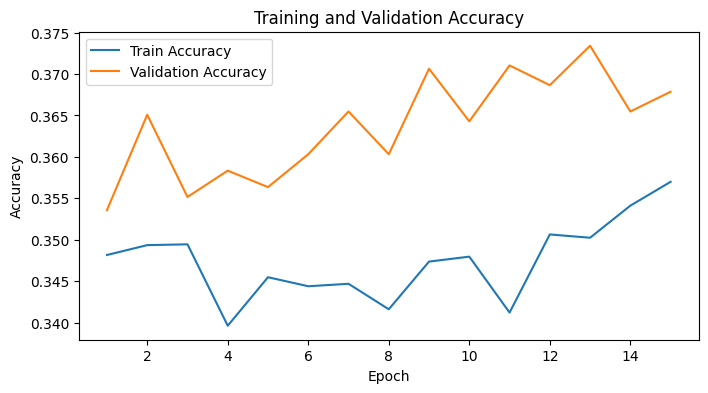

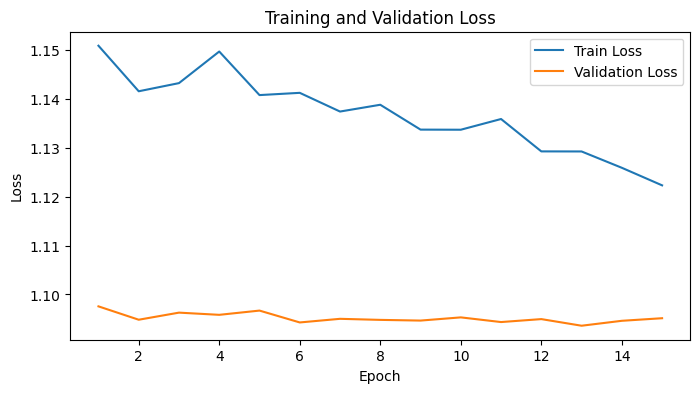

In [34]:
plot_train_metrics(history_5_classes)

### Predicciones y evaluación del modelo sin fine tuning

In [87]:
predictions = bert_model_5.predict(X_test)
predicted_labels = np.argmax(predictions, axis=-1)
true_labels = y_test  

print("true_labels:", true_labels)
print("predicted_labels:", predicted_labels)
print("unique values in true_labels:", np.unique(true_labels))
print("unique values in predicted_labels:", np.unique(predicted_labels))

99/99 ━━━━━━━━━━━━━━━━━━━━ 34s 342ms/step
true_labels: [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]]
predicted_labels: [1 2 2 ... 2 2 2]
unique values in true_labels: [0. 1.]
unique values in predicted_labels: [0 1 2 3]


In [88]:
# Convertir true_labels de one-hot encoding a etiquetas enteras
true_labels = np.argmax(y_test, axis=-1)

# Imprimir las etiquetas para ver la conversión
print("true_labels:", true_labels)
print("predicted_labels:", predicted_labels)
print("unique values in true_labels:", np.unique(true_labels))
print("unique values in predicted_labels:", np.unique(predicted_labels))

true_labels: [0 0 1 ... 2 3 3]
predicted_labels: [1 2 2 ... 2 2 2]
unique values in true_labels: [0 1 2 3 4]
unique values in predicted_labels: [0 1 2 3]


Classification Report:
               precision    recall  f1-score   support

     class 1       0.00      0.00      0.00       515
     class 2       0.09      0.05      0.07       482
     class 3       0.31      0.86      0.45       979
     class 4       0.20      0.05      0.09       591
     class 5       0.00      0.00      0.00       583

    accuracy                           0.28      3150
   macro avg       0.12      0.19      0.12      3150
weighted avg       0.15      0.28      0.17      3150



/opt/anaconda3/envs/anaconda_python_3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/anaconda_python_3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/anaconda_python_3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

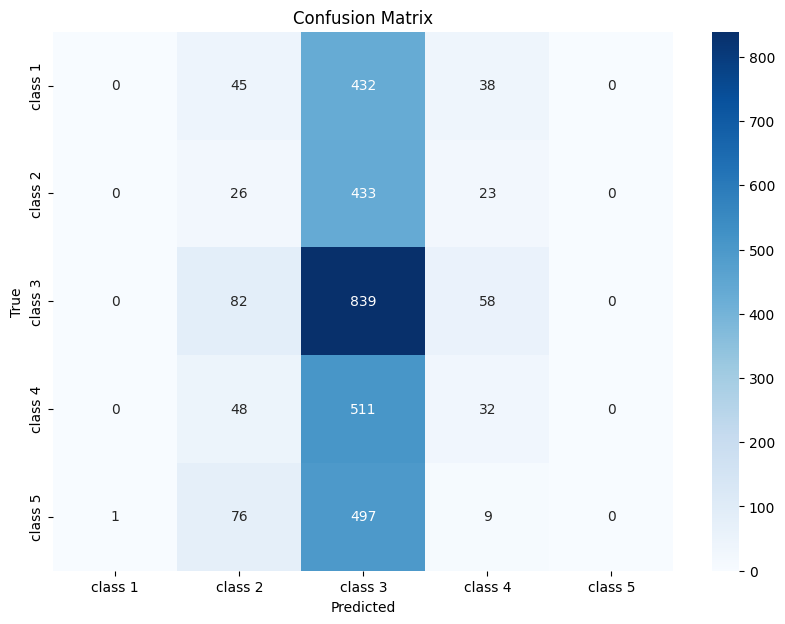

In [90]:
# Imprimir el classification report y la matriz de confusión
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Evaluar el modelo
target_names = ['class 1', 'class 2', 'class 3', 'class 4', 'class 5']
print("Classification Report:\n", classification_report(true_labels, predicted_labels, target_names=target_names))

# Crear y mostrar la matriz de confusión
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, 
            yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [38]:
# Calcular la exactitud (accuracy)
scores = bert_model_3.evaluate(X_test, y_test)
print(scores[0])
print(scores[1])
print(scores[2])

99/99 ━━━━━━━━━━━━━━━━━━━━ 98s 928ms/step - accuracy: 0.3287 - loss: 1.1045 - precision: 0.5320 - recall: 0.0091
1.1030139923095703
0.34063491225242615
0.4893617033958435


### Guardar el modelo

In [92]:
bert_model_5.save_weights('bert_model_5.weights.h5')

## Testeo

In [93]:
class_names = target_names

def test_app(text, model, class_names):
    tf_batch = bert_tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=max_length, # truncates if len(s) > max_length
        return_token_type_ids=False,
        return_attention_mask=True,
        pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
        truncation=True,
        return_tensors='tf'
    )

    print("Inputs ids:", tf_batch['input_ids'])
    print("Attention mask:", tf_batch['attention_mask'])

    X_ensayo = [tf_batch['input_ids'],  
          tf_batch['attention_mask']]
    
    y_prob_ensayo = model.predict(X_ensayo)
    y_prob = np.argmax(y_prob_ensayo, axis=1)
    print("Clasificación:", class_names[int(y_prob)])

In [94]:
bert_model_loaded = build_classification_model(model_name='bert-base-uncased', num_classes=num_classes, max_length=max_length, unfreeze_all_layers=False)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Layer name: layer_._0, Trainable: False
Layer name: layer_._1, Trainable: False
Layer name: layer_._2, Trainable: False
Layer name: layer_._3, Trainable: False
Layer name: layer_._4, Trainable: False
Layer name: layer_._5, Trainable: False
Layer name: layer_._6, Trainable: False
Layer name: layer_._7, Trainable: False
Layer name: layer_._8, Trainable: False
Layer name: layer_._9, Trainable: False
Layer name: layer_._10, Trainable: False
Layer name: layer_._11, Trainable: False


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_ids           │ (None, 139)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_mask      │ (None, 139)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_layer_6        │ (None, 768)       │          0 │ input_ids[0][0],  │
│ (BertLayer)         │                   │            │ attention_mask[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 768)       │          0 │ bert_layer_6[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 5)         │      3,845 │ dropout_6[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,845 (15.02 KB)

 Trainable params: 3,845 (15.02 KB)

 Non-trainable params: 0 (0.00 B)

In [95]:
# Cargar los pesos utilizando by_name=True
bert_model_loaded.load_weights('bert_model_5.weights.h5')

/opt/anaconda3/envs/anaconda_python_3.10/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [96]:
text = "I hate this app, it's horrible!"

test_app(text, bert_model_loaded, target_names)

/opt/anaconda3/envs/anaconda_python_3.10/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2870: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Inputs ids: tf.Tensor(
[[  101  1045  5223  2023 10439  1010  2009  1005  1055  9202   999   102
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]], shape=(1, 139), dtype=int32)
Attention mask: tf.Tensor(
[[1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

## Conclusiones

### Conclusión del Modelo de Clasificación con 5 Clases
El modelo de clasificación evaluado muestra un desempeño desigual a través de las diferentes clases. Se presentan las siguientes observaciones:

1. Desempeño General: 
- El modelo presenta una precisión y recall generales bastante bajos, con una exactitud total de 28%. Esto sugiere que el modelo tiene dificultades significativas para distinguir entre las clases de manera efectiva.

2. Análisis por Clase:

- Clase 1: La precisión, recall y f1-score son todos cero, indicando que el modelo no ha logrado predecir correctamente ninguna instancia de esta clase. Esto podría deberse a una falta de datos representativos o a problemas con el entrenamiento del modelo.

- Clase 2: El modelo tiene una precisión de 9% y un recall de 5%, resultando en un f1-score de 7%. Esto indica un desempeño muy limitado en esta clase, con muchas instancias incorrectamente clasificadas.

- Clase 3: Esta clase muestra un desempeño relativamente mejor, con un recall de 86% y un f1-score de 45%. Aunque la precisión sigue siendo baja (31%), el modelo logra identificar correctamente una proporción significativa de las instancias.

- Clase 4: La precisión y recall son bajas (20% y 5% respectivamente), con un f1-score de 9%. El modelo tiene problemas para identificar correctamente las instancias de esta clase.

- Clase 5: Similar a la Clase 1, esta clase tiene una precisión, recall y f1-score de cero, lo que indica una incapacidad del modelo para reconocer instancias de esta clase.

3. Promedios:

- Promedio Macro: La media de las métricas por clase (precisión, recall y f1-score) es bastante baja, con valores de 12%, 19% y 12%, respectivamente. Esto refleja el desempeño limitado del modelo en todas las clases, sin que ninguna clase sea particularmente fuerte.

- Promedio Ponderado: El promedio ponderado muestra una ligera mejora en comparación con el promedio macro, con valores de precisión, recall y f1-score de 15%, 28% y 17%, respectivamente. Sin embargo, estos valores todavía son bajos, lo que indica que el modelo necesita mejoras significativas.
